<a href="https://colab.research.google.com/github/kdhiru88/Insurance-cost-prediction/blob/main/Insurance_Cost_Prediction_Portfolio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown

In [3]:
import gdown

file_url = 'https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS'

gdown.download(url=file_url, output='insurance_data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance_data.csv
100%|██████████| 30.8k/30.8k [00:00<00:00, 27.4MB/s]


'insurance_data.csv'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import math
import os

insurance_df = pd.read_csv('insurance_data.csv')
display(insurance_df.head())

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


Basic EDA Analysis

In [5]:
insurance_df.shape

(986, 11)

In [6]:
insurance_df.info()
## All features are of int data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
insurance_df.isnull().sum()

## Insurance data set shows no null values

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


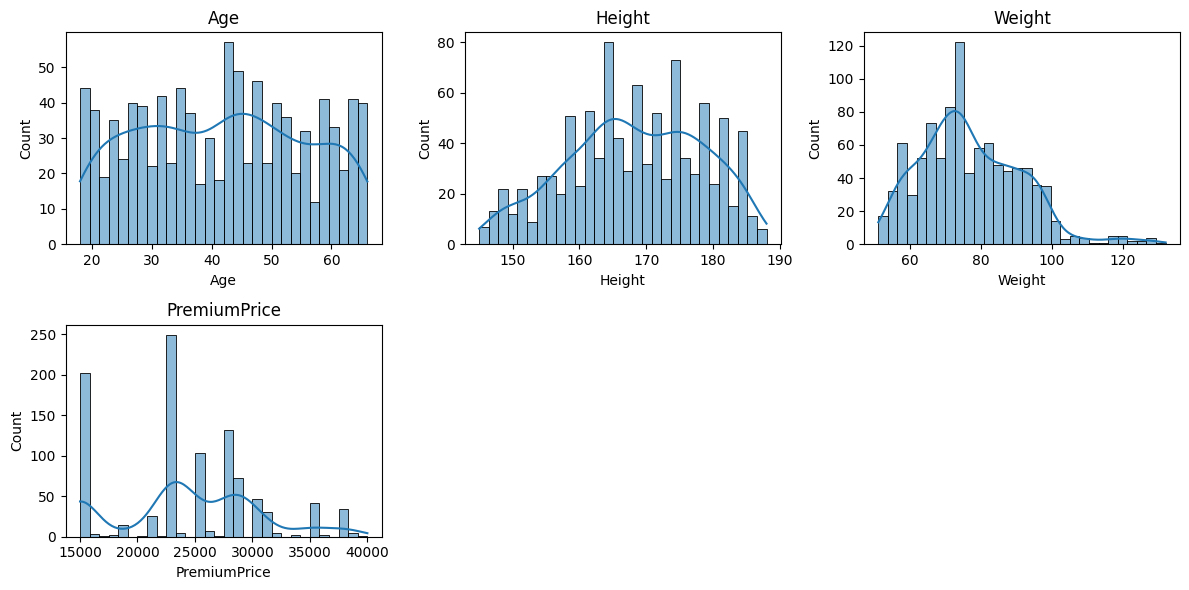

In [8]:
num_cols = insurance_df[['Age','Height','Weight','PremiumPrice']]
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(insurance_df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

##Age distribution shows peak btween 40-50 curve rises from 20 and comes down between 35-40 , then rise from 40 peaks around
## 44-45 age individuals
## Height shows max individuals height lies between 165-175 cm very few lie above 185 and very less individuals height is below 150

## Premium price shows left skeweed distribution with highest of indviduals having premium around 25000 followed by 15000,
## very less individuals paying higer premiums between 30000-40000

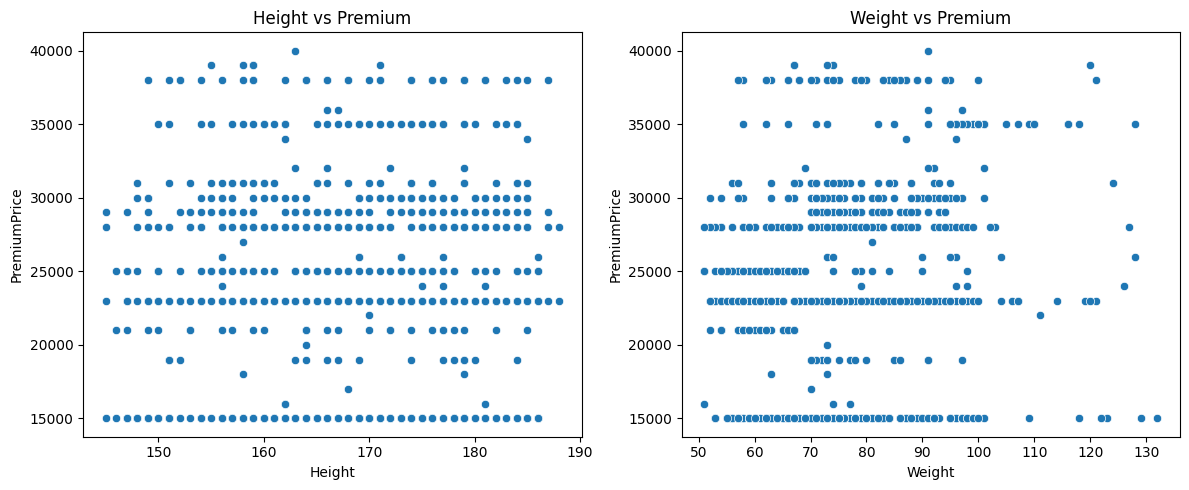

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=insurance_df, x='Height', y='PremiumPrice')
plt.title('Height vs Premium')

plt.subplot(1, 2, 2)
sns.scatterplot(data=insurance_df, x='Weight', y='PremiumPrice')
plt.title('Weight vs Premium')

plt.tight_layout()
plt.show()
##Scatter plot for Height and weight vs premium shows no relationship.

In [10]:
categorical_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
numerical_cols = ['Age', 'Height', 'Weight', 'PremiumPrice']


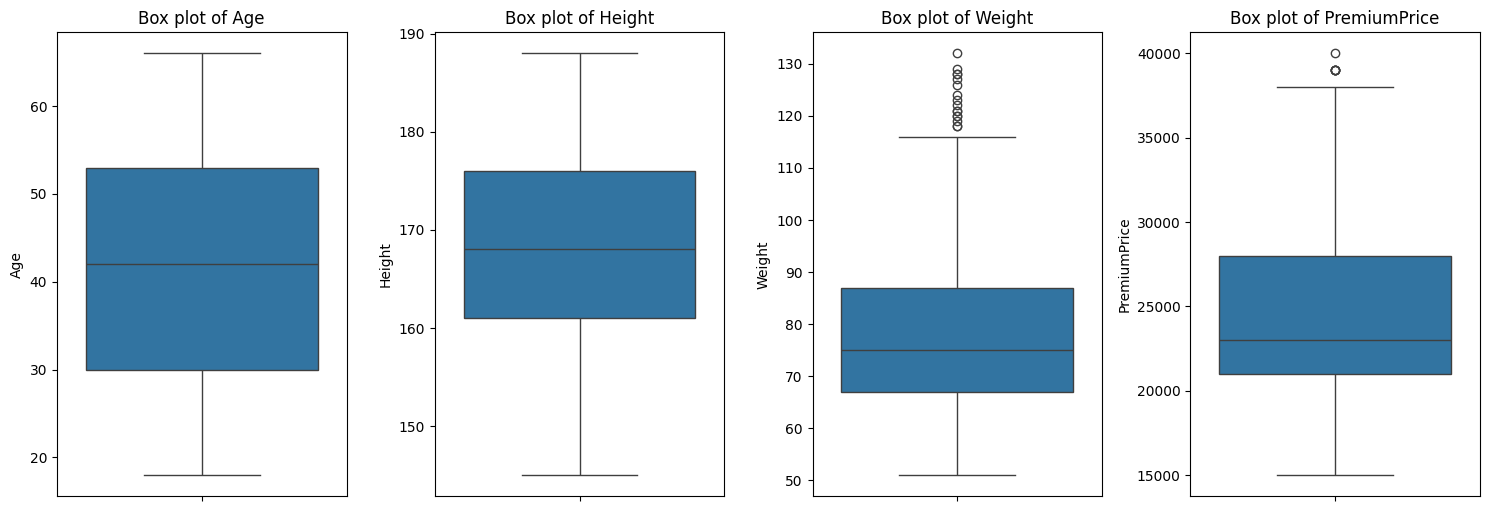

In [11]:
## Check Outliers for all numerical variables in dataset

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols), i + len(numerical_cols) + 1)
    sns.boxplot(y=insurance_df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

## Box plot of Age,Height shows uniform distribution with no outliers . Weight Box plot shows many outliers above 115Kg and its right skewed. Box plot of preimum
## price also shows 2 outliers having significantly higher premium prices and plot shows right skewed distribution.

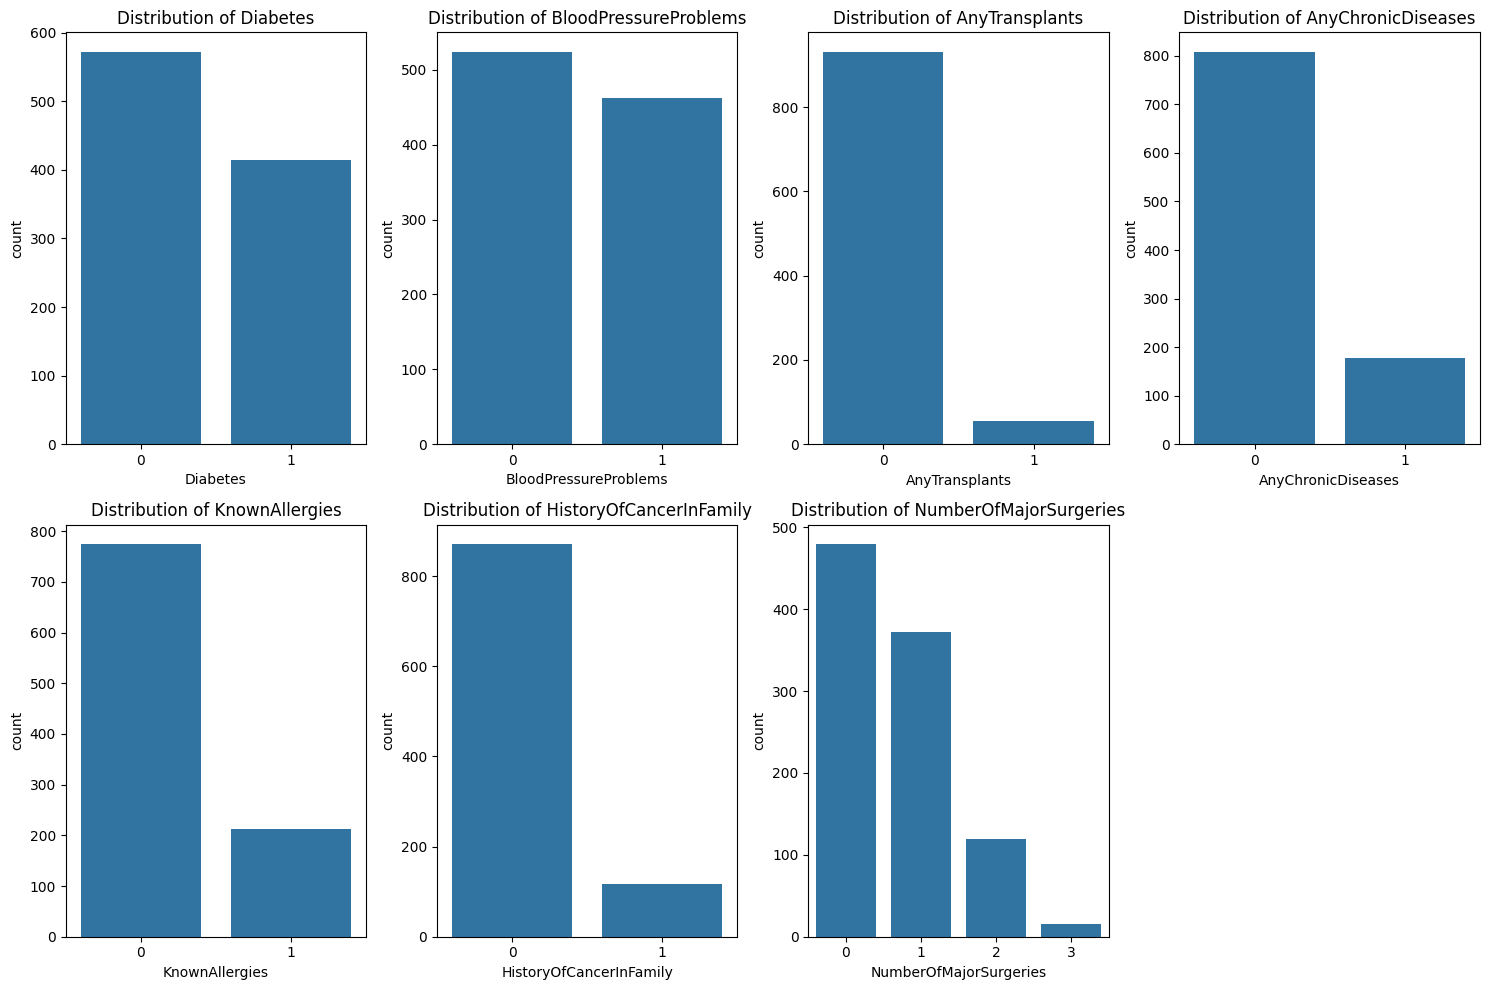

In [12]:
#Analyze count plots for different Health factors
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=insurance_df, x=col)
    plt.title(f'Distribution of {col}')
    # plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Bivariate Analysis

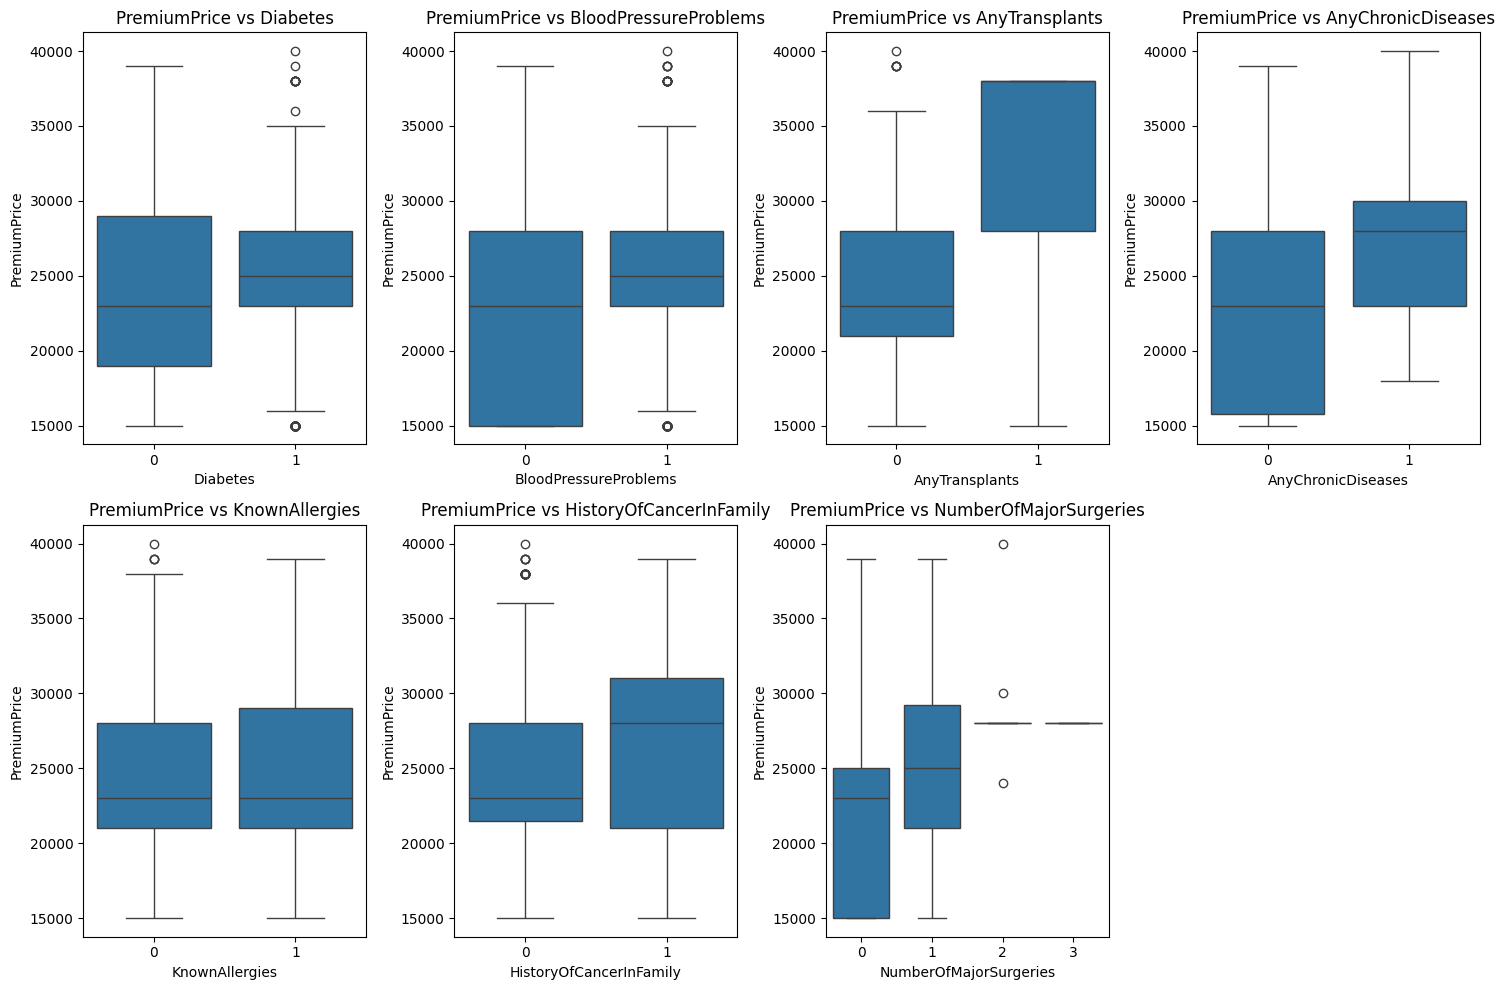

In [13]:
# Bivariate Analysis - PremiumPrice vs Health Factors

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=insurance_df, x=col, y='PremiumPrice')
    plt.title(f'PremiumPrice vs {col}')

plt.tight_layout()
plt.show()

## Diabetes: The box plot shows Distribution of premium prices appears to be slightly larger for individuals with Diabetes . Few outliers having
## significantly higher prices for individuals with diabetes

## BloodPressureProblems: Individuals with Blood Pressure Problems have a higher median Premium Price than those without BP.Few outliers for individuals having BP

## AnyTransplants: Individuals who undergone any Transplants show a significantly higher Price and a wider range of prices compared to those who haven't.

## This suggests a strong positive relationship between having a transplant and higher premium costs.

## AnyChronicDiseases: Individuals with Any Chronic Diseases have a higher median Premium Price than those without.

## KnownAllergies: Individuals with Known Allergies appear to have a slightly higher median Premium Price than those without.

## HistoryOfCancerInFamily: Individuals with a History of Cancer in their Family show a slightly higher median Premium Price compared to those without.

## NumberOfMajorSurgeries: As the number of major surgeries increases (from 0 to 3), the median Premium Price generally tends to increase.
## Individuals with 2 or 3 major surgeries have notably higher premium prices than those with 0 or 1 surgery.

In [14]:
## Detect Outliers
Q1 = insurance_df[numerical_cols].quantile(0.25)
Q3 = insurance_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((insurance_df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                (insurance_df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count outliers for all columns
outlier_counts_iqr = outliers_iqr.sum()
print("Outlier counts (IQR method):\n", outlier_counts_iqr)

## Age, Height columns have no outliers as evident in above Boxplot, Weight and Premium price has few outliers

Outlier counts (IQR method):
 Age              0
Height           0
Weight          16
PremiumPrice     6
dtype: int64


In [15]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(insurance_df[numerical_cols]))

outliers_z = (z_scores > 3)
outlier_counts_z = outliers_z.sum(axis=0)

print("Outlier counts (Z-score method):\n", outlier_counts_z)

## Detect outliers using Zscore, Zscore method is not giving correct outliers as we can clearly see from boxplot, there are few outliers for premium price
## but its not detected using Z-score

Outlier counts (Z-score method):
 [ 0  0 13  0]


In [16]:
## Add corelation matrix code

## Hypothesis Testing

T-Test/Anova Test

In [17]:
### Except No of Major surgeries column , rest of columns have 2 unique values only , so we can apply T-test for those columns and compare them against Premium price
## Use One way Anova for Major Surgeries column

# T-test Hypothesis
# Null Hypothesis H0- There is no significance difference between premium price across different categorical variable
# Alternate Hypothesis Ha- There is significance difference between premium price across different categorical variable

## Anova Hypothesis
##  Null Hypothesis H0- Mean Premium price is same for all individuals based on number of surgeries
# Alternate Hypothesis Ha- One or more group of individuals based on number of surgeries have different mean premium price

from scipy.stats import *
for col in categorical_cols:
  unique_values = insurance_df[col].unique()
  if len(unique_values) == 2:
    print('Apply T-test')
    group1 = insurance_df[insurance_df[col] == unique_values[0]]['PremiumPrice']
    group2 = insurance_df[insurance_df[col] == unique_values[1]]['PremiumPrice']
    t_stat, pvalue = ttest_ind(group1, group2)
    print(f"T-test for {col}: Statistic={t_stat}, P-value={pvalue}")
    if pvalue < 0.05:
      print(f"Reject Null Hypothesis,there is significant difference between premium price and {col}")
    else:
      print('Fail to reject Null Hypothesis')
  else:
    print('Apply ANOVA')
    groups = [insurance_df[insurance_df[col] == val]['PremiumPrice'] for val in unique_values]
    f_stats, p_value = f_oneway(*groups)
    print(f"ANOVA for {col}: Statistic={f_stats}, P-value={p_value}")
    if p_value < 0.05:
      print(f"Reject Null Hypothesis for {col}")
    else:
      print('Fail to reject Null Hypothesis')

## From below T-test results, as p_value is less than 0.05 , for Diabetes,Blood pressure problems , Any transplants , Any chronic diseases , History of Cancer
## health factors vs Premium Price shows we reject null hypothesis and there is significance difference in premium price due to these health factors.

## Number of Major surgeries has more than 2 unique values due to which we go for One Way Anova test , test results shows p_value is less than 0.05 , so we reject
## null hypothesis and One or more group of individuals based on number of surgeries have different mean premium price

Apply T-test
T-test for Diabetes: Statistic=-2.3975629574233563, P-value=0.01669009138530611
Reject Null Hypothesis,there is significant difference between premium price and Diabetes
Apply T-test
T-test for BloodPressureProblems: Statistic=-5.316365561489142, P-value=1.3100497090721927e-07
Reject Null Hypothesis,there is significant difference between premium price and BloodPressureProblems
Apply T-test
T-test for AnyTransplants: Statistic=-9.471654448151899, P-value=1.9787295423632772e-20
Reject Null Hypothesis,there is significant difference between premium price and AnyTransplants
Apply T-test
T-test for AnyChronicDiseases: Statistic=-6.69104572734849, P-value=3.713413765291482e-11
Reject Null Hypothesis,there is significant difference between premium price and AnyChronicDiseases
Apply T-test
T-test for KnownAllergies: Statistic=-0.3796775160044091, P-value=0.7042667378180334
Fail to reject Null Hypothesis
Apply T-test
T-test for HistoryOfCancerInFamily: Statistic=-2.617041984412821

Chi-square test


In [18]:
## Use Chi Square Test to evaluate association between different categorical variables
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        contingency_table = pd.crosstab(insurance_df[col1], insurance_df[col2])

        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        print(f"Chi-square test between {col1} and {col2}:")
        print(f"  P-value: {p_value}")

        alpha = 0.05
        if p_value < alpha:
            print(f"  Result:{col1} and {col2} are significantly associated to each other (reject H0)")
        else:
            print(f"Result: No significant association between {col1} & {col2}(fail to reject H0)")
        print("-" * 70)

## Below are results of Chi square test using all combinations of Categorical variables

Chi-square test between Diabetes and BloodPressureProblems:
  P-value: 7.945461025980538e-05
  Result:Diabetes and BloodPressureProblems are significantly associated to each other (reject H0)
----------------------------------------------------------------------
Chi-square test between Diabetes and AnyTransplants:
  P-value: 0.3123461364949182
Result: No significant association between Diabetes & AnyTransplants(fail to reject H0)
----------------------------------------------------------------------
Chi-square test between Diabetes and AnyChronicDiseases:
  P-value: 0.006445248971042237
  Result:Diabetes and AnyChronicDiseases are significantly associated to each other (reject H0)
----------------------------------------------------------------------
Chi-square test between Diabetes and KnownAllergies:
  P-value: 0.014820575766547196
  Result:Diabetes and KnownAllergies are significantly associated to each other (reject H0)
--------------------------------------------------------------

### Data Preprocessing

In [19]:
# Create New features to improve model performance

insurance_df['BMI'] = insurance_df['Weight'] / ((insurance_df['Height'] / 100) ** 2)
# insurance_df

insurance_df['AgeGroup'] = pd.cut(insurance_df['Age'],
                        bins=[0, 30, 45, 60, 100],
                        labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

risk_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'HistoryOfCancerInFamily']

insurance_df['HealthRiskScore'] = insurance_df[risk_cols].sum(axis=1)

# insurance_df

### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd

## Exclude categorical features as they dont need to be scaled
num_features = ['Age', 'Height', 'Weight', 'BMI','NumberOfMajorSurgeries', 'HealthRiskScore']
cat_feature = ['AgeGroup']

# StandardScaler for numerical features
scaler = StandardScaler()

# Fit and transform
insurance_df[num_features] = scaler.fit_transform(insurance_df[num_features])

## One hot encoder for Age group feature
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform
encoded_age_group = one_hot_encoder.fit_transform(insurance_df[cat_feature])

# Convert back to DataFrame
encoded_age_group_df = pd.DataFrame(
    encoded_age_group,
    columns=one_hot_encoder.get_feature_names_out(cat_feature),
    index=insurance_df.index
)

# Concatenate back with original dataframe (after dropping age_group col)
insurance_df_encoded = pd.concat(
    [insurance_df.drop(columns=cat_feature), encoded_age_group_df],
    axis=1
)
insurance_df_encoded

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,HealthRiskScore,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Young
0,0.233197,0,0,0,0,-1.306105,-1.399250,0,0,-0.891187,25000,-0.635742,-1.361470,1.0,0.0,0.0
1,1.307981,1,0,0,0,1.170852,-0.277062,0,0,-0.891187,29000,-0.839024,-0.265626,0.0,1.0,0.0
2,-0.411674,1,1,0,0,-1.008870,-1.258976,0,0,0.444239,23000,-0.651273,0.830219,1.0,0.0,0.0
3,0.734763,1,1,0,1,1.468086,1.125674,0,0,1.779665,28000,0.052692,1.926063,0.0,1.0,0.0
4,-0.268369,0,0,0,1,-0.216244,0.774990,0,0,0.444239,23000,0.761487,-0.265626,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,0,0,0,0,0.080991,-0.697882,0,0,-0.891187,15000,-0.681136,-1.361470,0.0,0.0,1.0
982,1.594590,1,1,0,0,-1.504261,-0.487472,0,0,3.115090,28000,0.415665,0.830219,0.0,0.0,0.0
983,1.021372,0,1,0,0,-1.306105,-0.417335,0,0,0.444239,29000,0.356016,-0.265626,0.0,1.0,0.0
984,0.376502,1,1,0,0,-1.008870,-0.277062,1,0,0.444239,39000,0.303181,0.830219,0.0,1.0,0.0


## ML Modelling

Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder


features = ['Age', 'Height', 'Weight', 'Diabetes', 'BloodPressureProblems',
            'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily',
            'NumberOfMajorSurgeries','BMI','HealthRiskScore','AgeGroup_Middle-aged','AgeGroup_Senior','AgeGroup_Young']
X = insurance_df_encoded[features]
y = insurance_df_encoded['PremiumPrice'] ## Prediction variable

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model using mse, rmse and r-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:}")

# Print the model coefficients and intercept
# Check model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

coefs = model.coef_
coef_df = pd.DataFrame({'features':X.columns ,'coefficients':coefs})
coef_df

# Linear Regression model has an average prediction error of around 3044.45 and explains about 78.26% of the variability in premium prices

# AnyTransplants shows  largest positive coefficient, indicating a significant increase in premium prices for individuals who have undergone any transplant

Mean Squared Error (MSE): 9268694.011191411
Root Mean Squared Error (RMSE): 3044.4529904715905
R-squared (R2): 0.7826433572034229
Model Coefficients: [ 2.62072755e+03 -4.81663241e+02  1.70567321e+03 -2.37005051e+03
 -1.76916149e+03  5.59591545e+03  2.23744799e+02 -4.27712696e+00
 -1.77635717e+02 -7.95389182e+02  1.83682280e+03  3.91863484e+02
  1.16182649e+03 -4.52328995e+03]
Model Intercept: 26511.829377598067


,features,coefficients
0,Age,2620.727555
1,Height,-481.663241
2,Weight,1705.673211
3,Diabetes,-2370.050512
4,BloodPressureProblems,-1769.161490
5,AnyTransplants,5595.915452
6,AnyChronicDiseases,223.744799
7,HistoryOfCancerInFamily,-4.277127
8,NumberOfMajorSurgeries,-177.635717
9,BMI,-795.389182


## Tree-based Models

Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model using mse, rmse and r-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf:}")
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest Mean Absolute Error (MAE): {mae}")

## Random Forest model explains 89.32 % of the variability in premium prices. RMSE value (2134.05) is also lowest among Linear Regression and XG boost which indicates mean error
## in premium price prediction . Mean Absoulte error shows error in predicting premium price by 1048

Random Forest Mean Squared Error (MSE): 4554203.95959596
Random Forest Root Mean Squared Error (RMSE): 2134.058096584055
Random Forest R-squared (R2): 0.8932010829062406
Random Forest Mean Absolute Error (MAE): 1048.080808080808


XGB Boosting

In [23]:
pip install xgboost

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize XGB model
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGB RMSE: {rmse}")
print(f"XGB MAE: {mae}")
print(f"XGB R2:{r2}")

XGB RMSE: 2476.33458967079
XGB MAE: 1431.359375
XGB R2:0.856195330619812


Gradient Boosting

In [25]:
# Initialize and train the  model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate model using mse, rmse and r-squared
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Gradient Boosting R-squared (R2): {r2_gb:}")

Gradient Boosting Mean Squared Error (MSE): 5118697.001175098
Gradient Boosting Root Mean Squared Error (RMSE): 2262.4537566931835
Gradient Boosting R-squared (R2): 0.8799633697773444


### Feature Importance Analysis (for Tree-based Models)

In [26]:
# Feature importance for Random Forest
feature_importances_rf = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values('importance', ascending=False)

print("Random Forest Feature Importances:")
display(feature_importances_rf)

# Feature importance for Gradient Boosting
feature_importances_gb = pd.DataFrame({'feature': features, 'importance': gb_model.feature_importances_})
feature_importances_gb = feature_importances_gb.sort_values('importance', ascending=False)

print("\nGradient Boosting Feature Importances:")
display(feature_importances_gb)

## The feature importance analysis for Random forest and Gradient boosting confirms that Age (0.616163) is the most critical factor in predicting insurance premium prices
## in this dataset,followed by AnyTransplants(0.092626), Weight, and BMI. This information can be valuable for understanding the key drivers of premium costs.

Random Forest Feature Importances:


,feature,importance
0,Age,0.620759
5,AnyTransplants,0.094827
2,Weight,0.084531
9,BMI,0.052006
8,NumberOfMajorSurgeries,0.034640
6,AnyChronicDiseases,0.033768
1,Height,0.027063
7,HistoryOfCancerInFamily,0.023364
10,HealthRiskScore,0.013961
4,BloodPressureProblems,0.007733



Gradient Boosting Feature Importances:


,feature,importance
0,Age,0.685307
5,AnyTransplants,0.110784
2,Weight,0.058042
6,AnyChronicDiseases,0.036223
9,BMI,0.034861
8,NumberOfMajorSurgeries,0.028900
7,HistoryOfCancerInFamily,0.015022
1,Height,0.012448
4,BloodPressureProblems,0.005107
13,AgeGroup_Young,0.004833


## Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=3)

print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cv_scores.mean()* 100:.2f}%')
## Using K fold cross validation for Random Forest shows model is performing well across different subsets of dataset

Cross-Validation Results (Accuracy):
  Fold 1: 78.43%
  Fold 2: 82.55%
  Fold 3: 75.56%
Mean Accuracy: 78.85%


In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(gb_model, X, y, cv=3)

print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cv_scores.mean()* 100:.2f}%')

## Using K fold cross validation for Gradient booster shows mean accuracy of 76.41% , so random forest is performing better here

Cross-Validation Results (Accuracy):
  Fold 1: 76.58%
  Fold 2: 79.29%
  Fold 3: 73.35%
Mean Accuracy: 76.41%


Confidence Interval for prediction Reliability

In [30]:
X_test

,Age,Height,Weight,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,HealthRiskScore,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Young
613,0.591458,-0.315322,0.494443,0,0,0,0,1,0.444239,0.577513,-0.265626,0.0,1.0,0.0
451,-0.196717,1.666243,-0.277062,0,0,0,1,1,0.444239,-1.043498,0.830219,1.0,0.0,0.0
731,1.666243,-0.315322,0.704853,1,1,0,0,0,-0.891187,0.765053,0.830219,0.0,0.0,0.0
436,-0.913240,1.071773,-0.487472,0,0,0,0,1,0.444239,-0.955411,-0.265626,0.0,0.0,1.0
275,0.448154,0.279147,0.494443,1,1,0,0,0,-0.891187,0.215478,0.830219,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.519806,-0.810713,2.317998,1,0,0,0,1,0.444239,2.639357,0.830219,0.0,1.0,0.0
506,0.878068,1.567165,0.284033,0,0,0,0,0,0.444239,-0.601776,-1.361470,0.0,1.0,0.0
49,-1.558110,-0.810713,0.424306,0,0,0,0,0,-0.891187,0.844355,-1.361470,0.0,0.0,1.0
717,0.591458,0.675460,0.845127,1,1,0,0,0,1.779665,0.272396,0.830219,0.0,1.0,0.0


In [31]:
## Get predictions from all trees
import warnings
warnings.filterwarnings("ignore")

all_tree_preds = np.stack([tree.predict(X_test) for tree in rf_model.estimators_], axis=1)

# Mean prediction
y_pred = all_tree_preds.mean(axis=1)

# 95% Prediction Interval
lower = np.percentile(all_tree_preds, 2.5, axis=1)
upper = np.percentile(all_tree_preds, 97.5, axis=1)

for i in range(5):
    print(f"Predicted Premium: {y_pred[i]:.2f}, 95% PI: ({lower[i]:.2f}, {upper[i]:.2f})")

## From below output :

## case 1 ,model is fairly confident. Actual premium is very likely within ±9k of prediction.

## Case2 : Small interval,strong confidence. Actual premium should fall within +3k–6k range.

## Case3 : Wider interval, but more uncertainty (±5k).

## last case shows Wide range (±13k)Suggests higher variance in this feature group.

Predicted Premium: 29204.00, 95% PI: (20000.00, 31000.00)
Predicted Premium: 29960.00, 95% PI: (23950.00, 31000.00)
Predicted Premium: 30282.00, 95% PI: (26000.00, 35000.00)
Predicted Premium: 16668.00, 95% PI: (15000.00, 32000.00)
Predicted Premium: 26250.00, 95% PI: (23000.00, 39000.00)


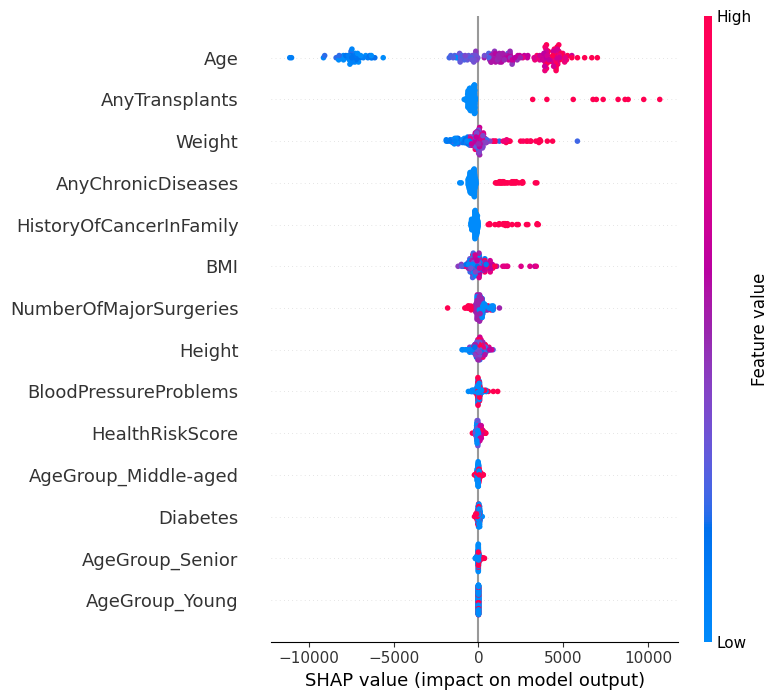

In [32]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


## Use SHAP to visualize XGB boost feature importance, we can observe from below plot , Age is the most important feature as it has more red dots in horizontal direction
## indicating it has largest impact on the premium price predictions.
## AnyTransplants is also significant: Having an AnyTransplants (red dots) also strongly increases the predicted premium, followed by Weight, AnyChronicdiseases,Weight
## and BMI. These also show an impact, with higher values (red) generally leading to higher predicted premiums by XGB boost model

In [33]:
import pickle

# Save the Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model saved as rf_model.pkl")

# Save the StandardScaler used for numerical features
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("StandardScaler saved as scaler.pkl")

# Save the OneHotEncoder used for the 'AgeGroup' feature
with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

print("OneHotEncoder saved as one_hot_encoder.pkl")

Random Forest model saved as rf_model.pkl
StandardScaler saved as scaler.pkl
OneHotEncoder saved as one_hot_encoder.pkl
